In [2]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#We will use the urllib.request module to open URLs. 
#We will use BeautifulSoup to extract data from html files. The Beautiful Soup library's name is bs4 which stands for BeautifulSoup, version 4.
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [4]:
#After importing necessary modules, specify the URL containing the dataset and pass it to urlopen() to get the html of the page.
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [5]:
#After getting the HTML page create a Beautiful Soup object from the html. This is done by passing the html to the BeautifulSoup() function.
#The second argument 'lxml' is the html parser, one of several such parsers available for use.
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [6]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [7]:
import bs4

In [8]:
bs4.BeautifulSoup

bs4.BeautifulSoup

In [9]:
# Get the title
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [10]:
# Print out the text
text = soup.get_text()
print(soup.text)








Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!





















 2017 Intel Great Place to Run 10K \ Urban Clash Games
 Hillsboro Stadium, Hillsboro, OR 
 June 2nd, 2017


                            





 Email
                        timing@hubertiming.com with results questions. Please include your bib number if you have it.


                    






Huber Timing Home





10K:


Finishers:
577


Male:
414


Female:
163










 5K Individual
 5K Team
 10K Individual
 10K Team
 Summary




Indvidual Results



10K Results



Search:

Search
Division:

Men
Women
Non-Binary
Masters Men
Masters Women
Masters Non-Binary

F 18-25
F 26-35
F 36-45
F 46-55
F Under 18
M 18-25
M 26-35
M 36-45
M 46-55
M 55+
M Under 18
 Team:

Unattached
COLUMBIA TEAM A
COLUMBIA TEAM B
COLUMBIA TEAM C
COLUMBIA TEAM D
COLUMBIA TEAM E
DTNA1
DTNA2
DTNA3
FXG1
INTEL TEAM A
INTEL TEAM B
INTEL TEAM C
INTEL TEAM D
INTEL TEAM E
INTEL TEAM F
INTEL TEAM G
INTEL TEAM H
INTEL TEAM I

In [11]:
# Use the find_all() method of soup to extract useful html tags within a webpage.
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

In [12]:
# Use a for loop and the get("href") method to extract and print out only hyperlinks.
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [13]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

           

In [14]:
# Getting all of the table’s rows in list form first and then convert that list into a pandas dataframe. 
# Below is a for loop that iterates through table rows and prints out the cells of the rows.
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [15]:
# To remove html tags using Beautiful Soup, pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags.
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text(strip=True)
print(cleantext)

[577,443,LIBBY B MITCHELL,F,HILLSBORO,OR,1:41:18,1:42:10,]


In [16]:
# Below code generates an empty list, extracts text between html tags for each row, and appends it to the assigned list.
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    clean3 = BeautifulSoup(str_cells, "lxml").get_text(strip=True)
    list_rows.append(clean3)
print(clean2)
type(clean2)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


str

In [17]:
# The next step is to convert the list into a pandas dataframe and view of the first 10 rows of data.
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:,577]"
2,"[Male:,414]"
3,"[Female:,163]"
4,[]
5,"[1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]"
6,"[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,..."
7,"[3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]"
8,"[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]"
9,"[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39..."


In [18]:
# Use the str.split() method to split the "0" column into multiple columns at the comma position.
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F]
7,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F]


In [19]:
# Use the strip() method to remove the opening square bracket on column "0".
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F]


In [20]:
# The table is missing table headers. So use find_all() method to get the table headers.
col_labels = soup.find_all('th')

In [21]:
# Similar to table rows, you can use Beautiful Soup to extract text in between html tags for table headers.
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']


In [22]:
# Next convert the table headers to a new pandas dataframe.
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


In [23]:
# Again, split column "0" into multiple columns at the comma position for all rows.
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]


In [24]:
# Next, concatenate the two dataframes into one using the concat() method.
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]


In [25]:
# Next, re-configure the data frame so that the first row is the table header.
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


In [26]:
# For analysis, getting an overview of the data as shown below.
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

In [27]:
# Transform it again to drop all rows with any missing values.
df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     578 non-null    object
 1    Bib       578 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.2+ KB


(578, 9)

In [28]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F]


In [29]:
# Clean up the headers a bit more by renaming the '[Place' and ' Team]' columns.
# Make sure you include a space after the quotation mark in ' Team]'.
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F]


In [30]:
# Data cleaning step involves removing the closing bracket for cells in the "Team" column.
df7['Team'] = df7['Team'].str.strip(']')
df7

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F
...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY,F,OTHER,OR,1:38:17,1:38:34,
578,574,467,ROHIT B DSOUZA,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I
579,575,471,CENITA D'SOUZA,F,PORTLAND,OR,1:38:32,1:40:34,
580,576,338,PRANAVI APPANA,F,HILLSBORO,OR,1:40:47,1:42:01,


In [31]:
print(df7.columns)

Index(['Place', ' Bib', ' Name', ' Gender', ' City', ' State', ' Time',
       ' Gun Time', 'Team'],
      dtype='object')


In [32]:
# Convert the column to a list first for manipulation.
time_list = df7[' Time'].tolist()

In [33]:
# Use a for loop to convert ' Time' to minutes

time_mins = []
for i in time_list:
    time_parts = i.split(':')
    if len(time_parts) == 3:
        h, m, s = time_parts
        math = (int(h) * 3600 + int(m) * 60 + int(s))/60
        time_mins.append(math)
    elif len(time_parts) == 2:
        m, s = time_parts
        math = (int(m) * 60 + int(s))/60
        time_mins.append(math)

In [34]:
# Convert the list back into a dataframe and create a new column ("Runner_mins") for runner times expressed in just minutes. 
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F,39.350000


In [35]:
# "describe" method that computes a generous list of explanatory statistics for the dataframe.
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


([<matplotlib.axis.XTick at 0x1f775b0a3d0>], [Text(1, 0, 'Runners')])

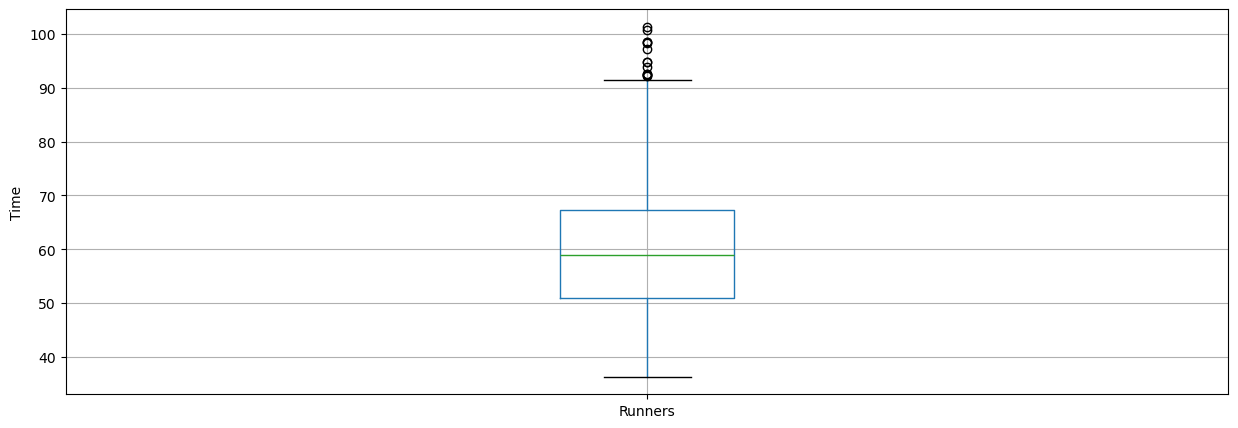

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5


df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Time')
plt.xticks([1], ['Runners'])

C:\Users\HP\AppData\Local\Temp\ipykernel_16788\2333182940.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


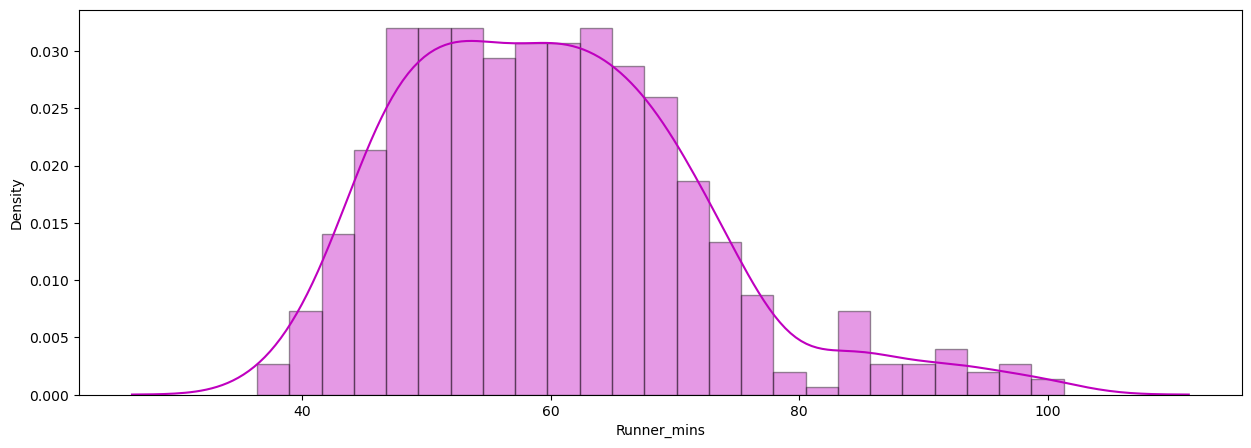

In [37]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16788\3586507676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Temp\ipykernel_16788\3586507676.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

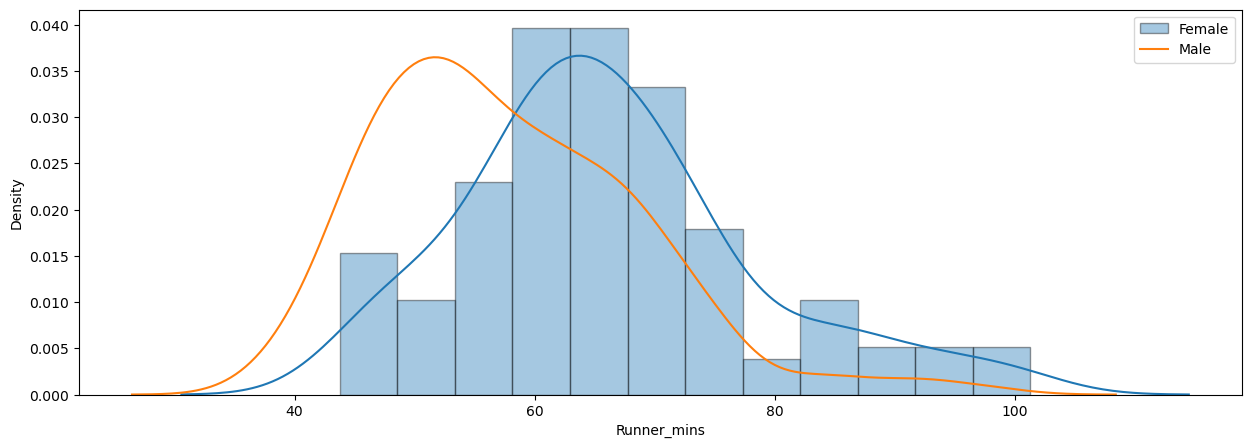

In [38]:
f_fuko = df7.loc[df7[' Gender']=='F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']=='M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [39]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
F             163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
M             414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
F        72.058333  101.300000  
M        64.804167   98.516667  


Text(0.5, 0.98, '')

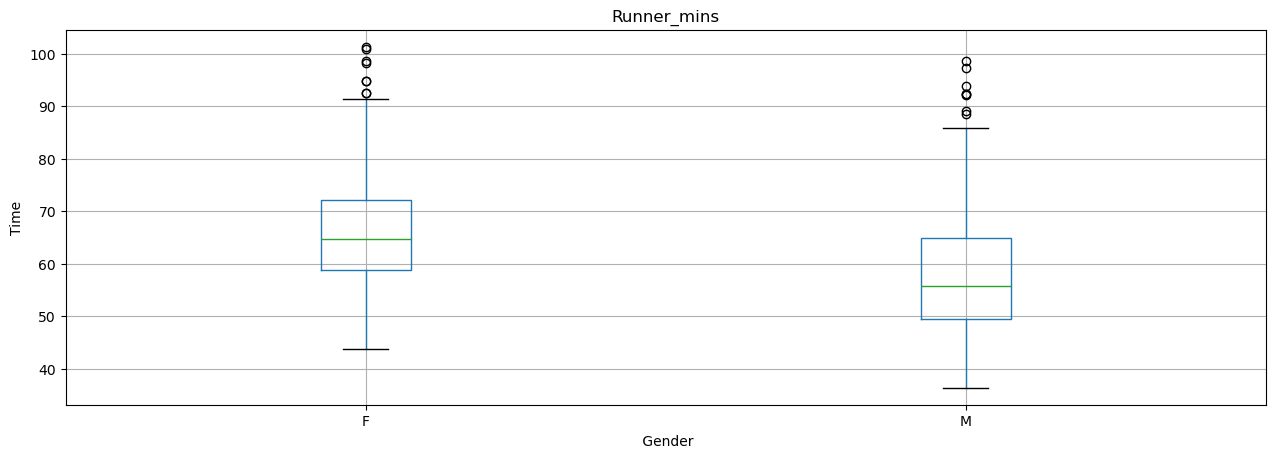

In [40]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Time')
plt.suptitle("")

In [ ]:
What was the average finish time for the runners?
Answer:
The average finish time for males is 66.11minutes and the average finish time for females is 57.64 minutes.
Overall, the average finish time is approximately 60.04 minutes


In [ ]:
Did the runners' finish times follow a normal distribution?
Answer:
Yes, the runners finish times followed normal distribution

In [ ]:
Were there any performance differences between males and females of various age groups?
Answer:
Yes, we can see differences between males and females of various age groups in the above graphs.